# Анализ рынка недвижимости
## Источник данных
### Набор данных - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction  
### Продажи домов в округе Кинг, США
### Набор данных содержит цены на продажу домов в округе Кинг, включая Сиэтл. Он включает дома, проданные в период с мая 2014 года по май 2015 года.
### Автор - harlfoxem
### Лицензия - CC0: Public Domain

# 1. Краткое содержание dataset - описание данных

### 1. **id**: Уникальный идентификатор дома.
### 2. **date**: Дата продажи дома (в формате YYYYMMDD).
### 3. **price**: Цена продажи дома (в долларах).
### 4. **bedrooms**: Количество спален.
### 5. **bathrooms**: Количество ванных комнат (может быть дробным).
### 6. **sqft_living**: Площадь жилого пространства (в квадратных футах).
### 7. **sqft_lot**: Площадь земельного участка (в квадратных футах).
### 8. **floors**: Количество этажей (может быть дробным).
### 9. **waterfront**: Признак наличия водного фронта (0 - нет, 1 - да).
### 10. **view**: Оценка вида из дома (0 - нет вида, 4 - лучший вид).
### 11. **condition**: Общее состояние дома (от 1 до 5).
### 12. **grade**: Оценка качества материалов и отделки (от 1 до 13).
### 13. **sqft_above**: Площадь жилого пространства над землёй (в квадратных футах).
### 14. **sqft_basement**: Площадь подвала (в квадратных футах).
### 15. **yr_built**: Год постройки дома.
### 16. **yr_renovated**: Год последнейrenovation (0 - не было ремонта).
### 17. **zipcode**: Почтовый индекс.
### 18. **lat**: Широта местоположения дома.
### 19. **long**: Долгота местоположения дома.
### 20. **sqft_living15**: Средняя площадь жилого пространства 15 ближайших домов (в квадратных футах).
### 21. **sqft_lot15**: Средняя площадь земельного участка 15 ближайших домов (в квадратных футах).

# 2. Предобработка данных

In [ ]:
import pandas as pd

# Считывание данных
data = pd.read_csv('kc_house_data.csv')

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Проверка данных на наличие пропусков, дубликатов и некорректных значений.

In [ ]:
# Проверка на пропуски и дубликаты
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

# Проверка на некорректные значения
incorrect_values = data[data['price'] < 0]

# Вывод результатов проверки
print("Пропуски в данных:\n", missing_values)
print("Число дубликатов:", duplicates)
print("Число некорректных значений:\n", len(incorrect_values))
print("Размерность датасета:", data.shape)

Пропуски в данных:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Число дубликатов: 0
Число некорректных значений:
 0
Размерность датасета: (21613, 21)


### Преобразование данных: поле date в формат даты

In [ ]:
# Выводим типы данных столбцов
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# вывод первых 5 строк поля date
print(data['date'].head())

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object


In [ ]:
# Преобразование данных: поле date в формат даты
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

# Проверка результата
print(data['date'].head())

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]


In [ ]:
# Сохранение датафрейма в формате csv
data.to_csv("kc_house_data_2.csv", index=False)

# 2. Визуализация выборок

## 2.1. Зависимость цены продажи от площади

Введите почтовый индекс: 98103


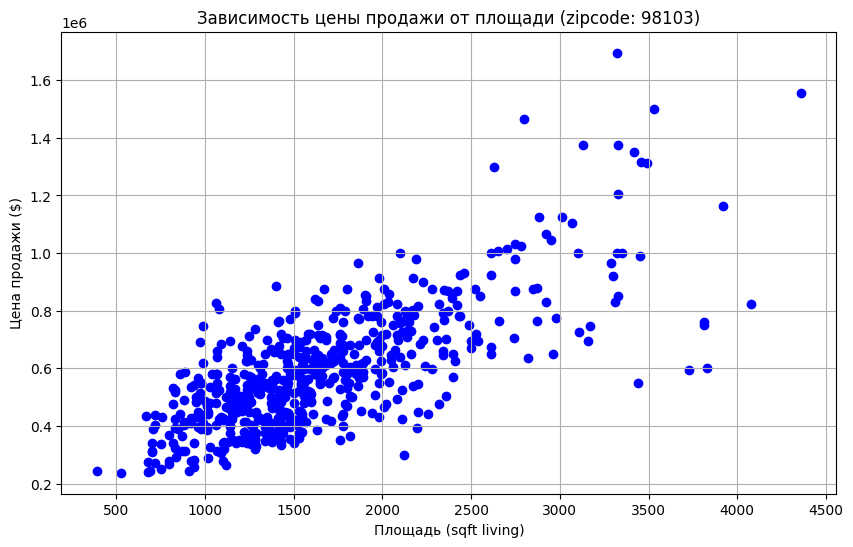

In [ ]:
import pandas as pd # импорт pandas
import matplotlib.pyplot as plt  # Импортируем библиотеку matplotlib для визуализации данных

# Считывание данных
data = pd.read_csv('kc_house_data.csv')

# Выбор почтового индекса, например 98103
zipcode = int(input('Введите почтовый индекс: '))  # Запрашиваем у пользователя ввод почтового индекса и преобразуем его в целое число
filtered_data = data[data['zipcode'] == zipcode]  # Фильтруем исходные данные, выбирая только те строки, где почтовый индекс совпадает с введённым пользователем

# Построение графика
plt.figure(figsize=(10, 6))  # Создаём новую фигуру для графика с заданными размерами (10 дюймов в ширину и 6 дюймов в высоту)
plt.scatter(filtered_data['sqft_living'], filtered_data['price'], color='blue')  # Строим диаграмму рассеяния с площадью домов по оси X и ценами по оси Y, задавая цвет точек как синий
plt.title('Зависимость цены продажи от площади (zipcode: {})'.format(zipcode))  # Устанавливаем заголовок графика, подставляя введённый почтовый индекс
plt.xlabel('Площадь (sqft living)')  # Указываем подпись для оси X
plt.ylabel('Цена продажи ($)')  # Указываем подпись для оси Y
plt.grid()  # Включаем сетку на графике для лучшей читаемости
plt.show()  # Отображаем график на экране

**Вывод:**

1) С увеличением площади цена продажи также возрастает, что указывает на сильную положительную корреляцию.

2) Хотя большинство точек сосредоточено в верхней части графика, есть и выбросы, показывающие, что некоторые дома с меньшей площадью могут продаваться по высоким ценам, и наоборот.

3) Общий тренд показывает, что большая площадь обычно соответствует более высокой цене продажи, что ожидаемо в рыночных условиях.

4) Цены варьируются от 0.4 до 1.6 миллионов долларов для площадей от 500 до 4500 квадратных футов.

## 2.2 Зависимость количества продаж от месяца

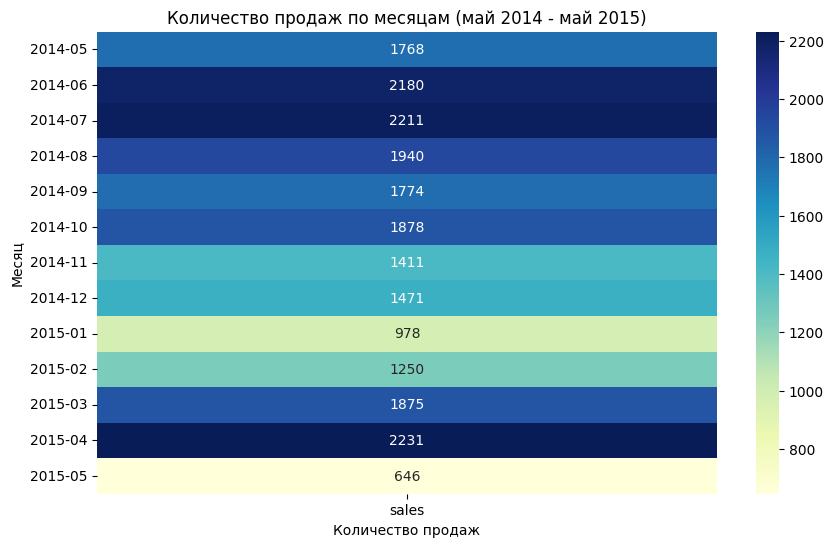

In [ ]:
# импорт модулей
import pandas as pd  # Импорт библиотеки Pandas для работы с данными
import seaborn as sns  # Импорт Seaborn для визуализации
import matplotlib.pyplot as plt  # Импорт Matplotlib для построения графиков

# Загрузка данных
data = pd.read_csv('kc_house_data.csv')  # Загрузка данных из CSV-файла в DataFrame

# Предобработка данных
data['date'] = pd.to_datetime(data['date'])  # Преобразование столбца 'date' в формат даты
data['year_month'] = data['date'].dt.to_period('M')  # Создание нового столбца 'year_month' с годом и месяцем

# Группировка данных
sales_count = data.groupby('year_month').size().reset_index(name='sales')  # Группировка данных по месяцам и подсчет продаж

# Построение тепловой карты
sales_count_pivot = sales_count.pivot_table(index='year_month', values='sales', aggfunc='sum')  # Создание сводной таблицы
plt.figure(figsize=(10, 6))  # Настройка размеров графика
sns.heatmap(sales_count_pivot, cmap='YlGnBu', annot=True, fmt='d')  # Построение тепловой карты с аннотациями
plt.title('Количество продаж по месяцам (май 2014 - май 2015)')  # Заголовок графика
plt.xlabel('Количество продаж')  # Метка оси X
plt.ylabel('Месяц')  # Метка оси Y
plt.show()  # Отображение графика на экране

**Вывод:**

1) В 2014 году продаж больше летом, далее идет спад осенью и зимой.

2) Март и апрель 2015 показывают сильный рост по сравнению с предыдущими месяцами, что может объясняться окончанием зимнего периода и активизации рынка недвижимости.

3) В мае 2015 года количество продаж сокращается, что может указывать на сезонные колебания в рынке недвижимости или на наступление определенных экономических условий

## 2.3. Зависимость цены продажи от количества спален

Введите количество спален: 5


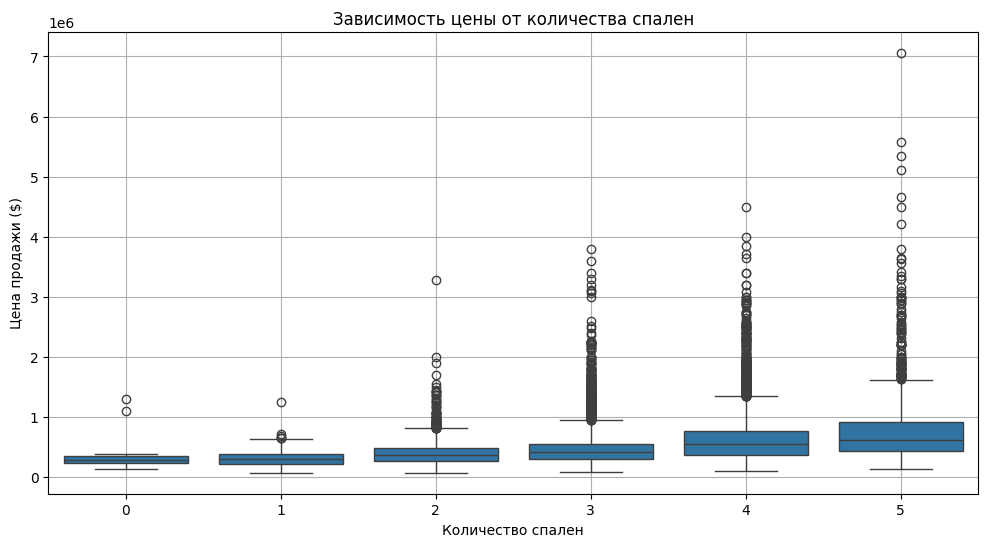

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('kc_house_data.csv')

# Ввод количества спален
bedrooms_input = int(input("Введите количество спален: "))

# Фильтрация данных по количеству спален
filtered_data = data[data['bedrooms'] <= bedrooms_input]

# Проверка на наличие данных
if filtered_data.empty:
    print(f"Нет данных для домов с {bedrooms_input} спальнями и меньше.")
else:
    # Построение графика
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='bedrooms', y='price', data=filtered_data)
    plt.title('Зависимость цены от количества спален')
    plt.xlabel('Количество спален')
    plt.ylabel('Цена продажи ($)')
    plt.grid(True)
    plt.show()

**Вывод:**

1) С увеличением количества спален наблюдается общий рост цены продажи. Это указывает на то, что более крупные дома с большим количеством спален, как правило, стоят дороже.

2) Разброс цен увеличивается с количеством спален. Например, дома с 4 и 5 спальнями имеют значительное количество выбросов, что может свидетельствовать о наличии объектов с аномально высокими ценами.

3) В группах с меньшим количеством спален (1-2) цены имеют меньший разброс, что указывает на более однородный рынок для небольших домов.

4) Наблюдаются выбросы в каждой категории, особенно в группах с 4 и 5 спальнями. Это может означать наличие на рынке особых объектов, которые не укладываются в общую тенденцию.

## 2.4. Зависимость цены продажи от возраста дома

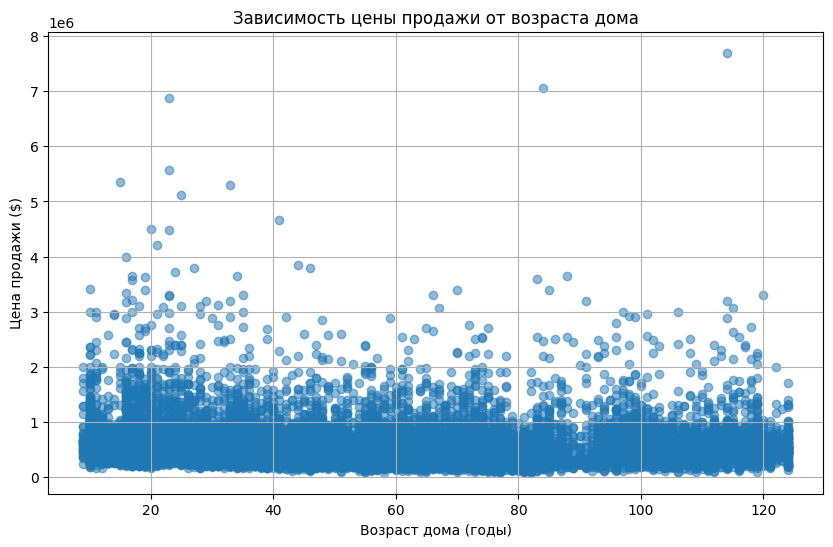

In [ ]:
# импорт модулей
import pandas as pd
import matplotlib.pyplot as plt

# Чтение CSV файла в DataFrame
data = pd.read_csv('kc_house_data.csv')

# Вычисление возраста дома
data['age'] = 2024 - data['yr_built']

# Построение графика зависимостей
plt.figure(figsize=(10, 6))  # Определяем размер графика
plt.scatter(data['age'], data['price'], alpha=0.5)  # Создаем диаграмму рассеяния
plt.title('Зависимость цены продажи от возраста дома')  # Заголовок графика
plt.xlabel('Возраст дома (годы)')  # Подпись по оси X
plt.ylabel('Цена продажи ($)')  # Подпись по оси Y
plt.grid(True)  # Включаем сетку для удобства
plt.show()  # Отображаем график

**Вывод:**

1) Между возрастом дома и ценой продажи наблюдается слабая корреляция. Дома различного возраста имеют широкий диапазон цен.

2) Наибольшее количество домов продается в диапазоне цен от 0 до примерно 1,5 миллиона долларов, независимо от возраста.

3) С возрастом, особенно после 60-70 лет, можно заметить, что доля домов с более высокими ценами уменьшается, что может указывать на тенденцию к снижению цен на старые дома.

4) Есть наблюдения дорогих домов даже среди более старых. Это может означать, что состояние, расположение и другие факторы могут существенно влиять на цену.

## 2.5. Зависимость цен на жилье от состояния

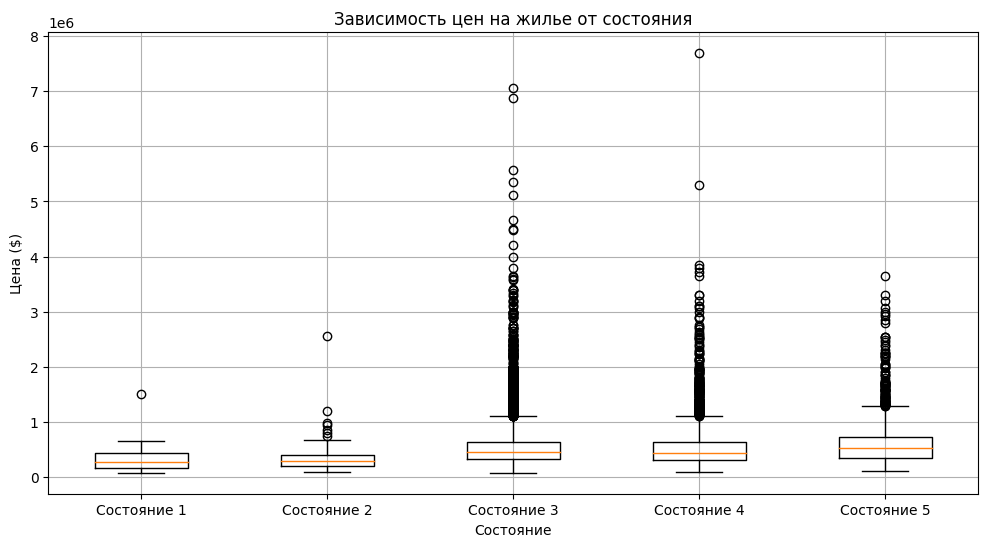

In [ ]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными
import matplotlib.pyplot as plt  # Импортируем библиотеку matplotlib для визуализации данных

# Загружаем данные из CSV файла
data = pd.read_csv('kc_house_data.csv')

# Создаем ящичную диаграмму цен по условиям домов
plt.figure(figsize=(12, 6))  # Устанавливаем размер фигуры
plt.boxplot([data[data['condition'] == i]['price'] for i in range(1, 6)],  # Генерируем данные для ящиков по условиям
            labels=['Состояние 1', 'Состояние 2', 'Состояние 3', 'Состояние 4', 'Состояние 5'])  # Названия ящиков
plt.title('Зависимость цен на жилье от состояния')  # Заголовок диаграммы
plt.xlabel('Состояние')  # Подпись оси X
plt.ylabel('Цена ($)')  # Подпись оси Y
plt.grid(True)  # Включаем сетку для удобства восприятия
plt.show()  # Отображаем диаграмму

**Вывод:**

1) Как видно из графика, состояние 1 и 2 имеют значительно меньшие медианные цены по сравнению с состоянием 4 и 5. Это указывает на то, что дома в хорошем состоянии (особенно 4 и 5) значительно ценятся выше.

2) Состояние 3 показывает наибольший разброс цен. Это может свидетельствовать о том, что в этом состоянии могут встречаться как относительно новые, так и более старые дома, что влияет на их стоимость.

3) Наличие множества выбросов в состоянии 3 и в меньшей степени в состояниях 2 и 4 может указывать на наличие вершин стоимости, возможно, из-за уникальных характеристик или местоположения определенных домов.

4) В общем, можно сделать вывод, что с улучшением состояния жилья его цена значительно возрастает, что отражает общую тенденцию на рынке недвижимости: больший уход за недвижимостью приводит к более высоким ценам.

## 2.6. Зависимость цены от площади участка

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

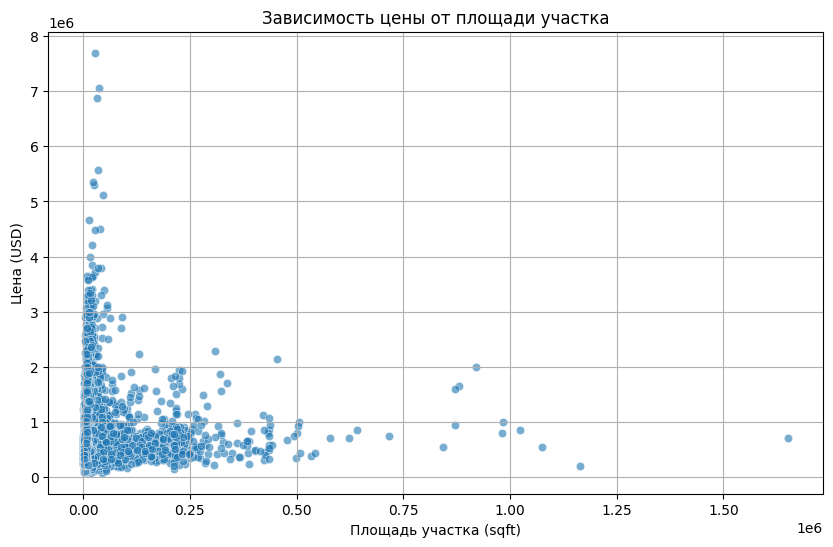

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = pd.read_csv('kc_house_data.csv')
# Вывод первых 5 строк для проверки данных
print(data.head())

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))  # Установка размера графика
sns.scatterplot(x='sqft_lot', y='price', data=data, alpha=0.6)  # Диаграмма рассеяния
plt.title('Зависимость цены от площади участка')  # Заголовок графика
plt.xlabel('Площадь участка (sqft)')  # Подпись оси X
plt.ylabel('Цена (USD)')  # Подпись оси Y
plt.grid(True)  # Включение сетки на графике
plt.show()  # Отображение графика

**Вывод:**

1) Наблюдается обратная зависимость между площадью участка и ценой. С увеличением площади участка цена, как правило, выше, но на больших площадях эта зависимость ослабевает.

2) Для участков с площадью более 0.5, цены на дома не показывают существенного роста, что может указывать на насыщение рынка.

3) Есть несколько доминантных наблюдений с высокими ценами, даже при относительно небольших площадях. Это может указывать на наличие дорогих домов или участков в популярных или престижных районах.

4) Значительное количество объектов с низкими ценами и маленькими участками указывает на наличие доступного жилья, что может быть важным для анализа доступности жилья в регионе.

## 2.7. Зависимость цены дома от количества ванных комнат

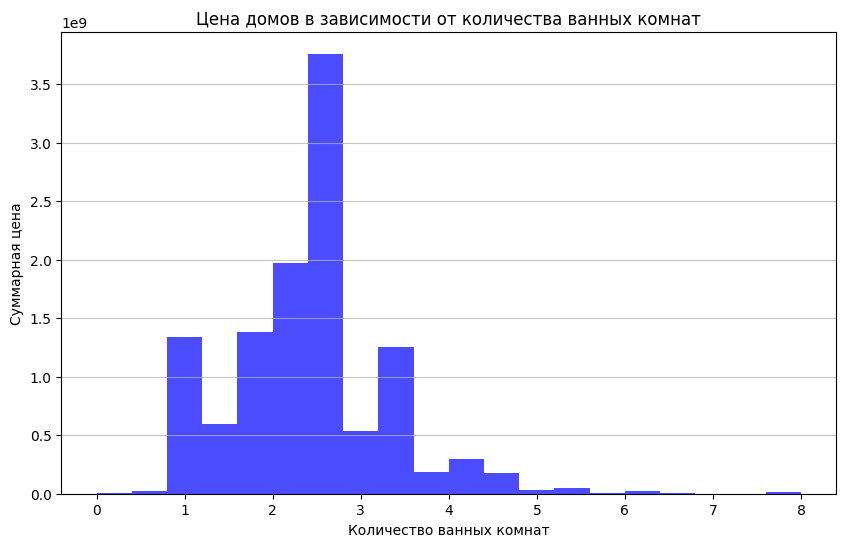

In [ ]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными
import matplotlib.pyplot as plt  # Импортируем matplotlib для визуализации

# Загружаем данные из CSV-файла
data = pd.read_csv('kc_house_data.csv')

# Строим гистограмму зависимости цены от количества ванных комнат
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.hist(data['bathrooms'], weights=data['price'], bins=20, alpha=0.7, color='blue')  # Строим гистограмму, веса - цена

# Настраиваем график
plt.title('Цена домов в зависимости от количества ванных комнат')  # Заголовок графика
plt.xlabel('Количество ванных комнат')  # Подпись оси X
plt.ylabel('Суммарная цена')  # Подпись оси Y
plt.grid(axis='y', alpha=0.75)  # Добавляем сетку по оси Y

# Показываем график
plt.show()

**Вывод:**

1) Дома с 2 и 3 ванными комнатами, очевидно, являются наиболее распространенными на рынке, и у них наиболее высокая суммарная цена.

2) С увеличением количества ванных комнат больше 3-х, наблюдается постепенное снижение суммарной цены, что может указывать на то, что такие дома либо реже продаются, либо имеют меньший спрос.

3) Дома с 1 ванной комнатой также имеют значительное количество, но их цена заметно ниже, что подтверждает, что наличие большего числа ванных комнат положительно сказывается на стоимости недвижимости.

## 2.8. Средняя цена домов по годам в округе Кинг

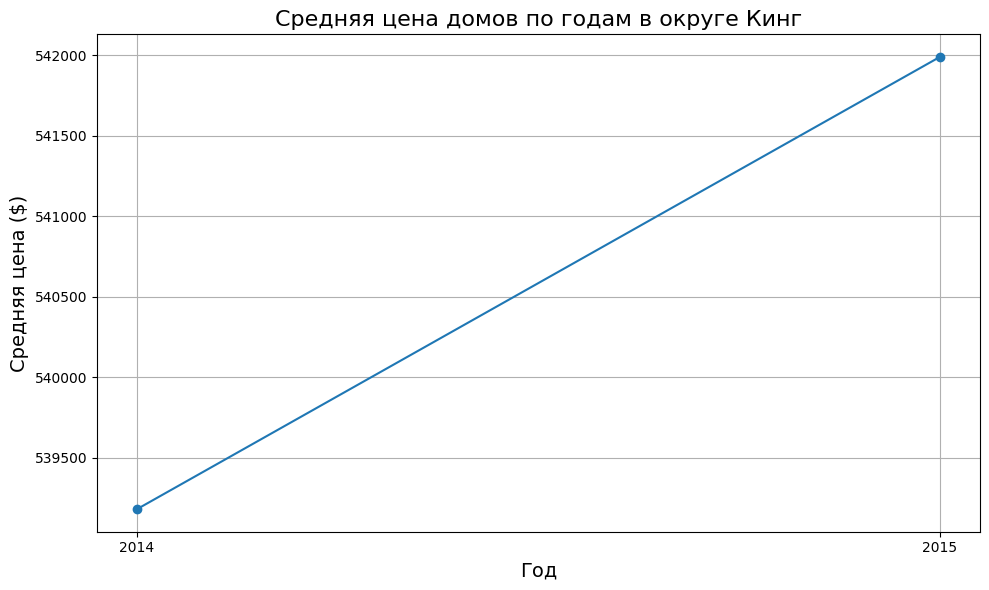

In [ ]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными
import matplotlib.pyplot as plt  # Импортируем matplotlib для визуализации данных

# Загружаем данные из CSV файла
data = pd.read_csv('kc_house_data.csv')

# Преобразуем столбец 'date' в формат даты
data['date'] = pd.to_datetime(data['date'])

# Извлекаем год из даты и создаем новый столбец 'year'
data['year'] = data['date'].dt.year

# Группируем данные по годам и рассчитываем среднюю цену домов
average_price_per_year = data.groupby('year')['price'].mean().reset_index()

# Создаем линейную диаграмму
plt.figure(figsize=(10, 6))  # Определяем размер графика
plt.plot(average_price_per_year['year'], average_price_per_year['price'], marker='o')  # Строим линейный график
plt.title('Средняя цена домов по годам в округе Кинг', fontsize=16)  # Заголовок графика
plt.xlabel('Год', fontsize=14)  # Подпись оси X
plt.ylabel('Средняя цена ($)', fontsize=14)  # Подпись оси Y
plt.grid()  # Добавляем сетку для удобства восприятия
plt.xticks(average_price_per_year['year'])  # Устанавливаем метки на оси X
plt.tight_layout()  # Оптимизируем размещение элементов графика
plt.show()  # Показываем график

**Вывод:** наблюдается стабильный увеличительный тренд, что может указывать на позитивные экономические условия и рост интереса к рынку недвижимости в округе Кинг.

## 2.9. Зависимость цен от количества этажей

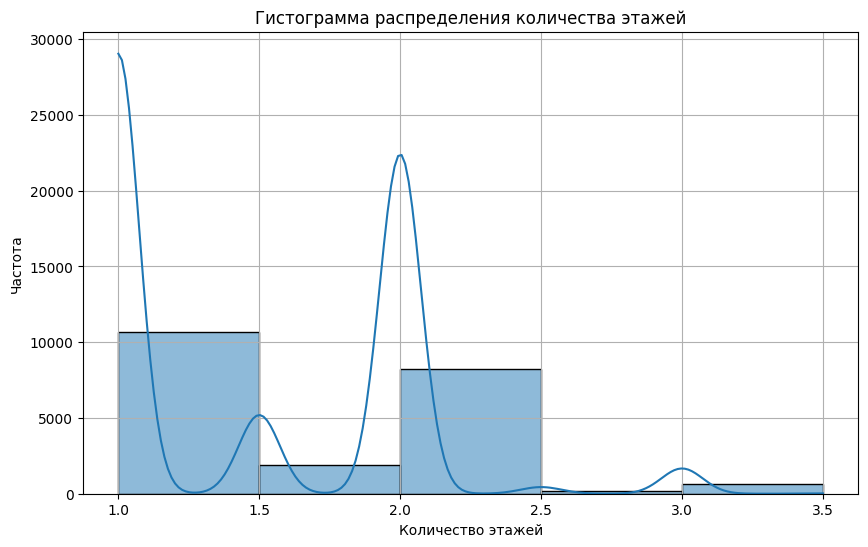

In [ ]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными
import matplotlib.pyplot as plt  # Импортируем matplotlib для визуализации данных
import seaborn as sns  # Импортируем seaborn для улучшенной визуализации

# Загружаем данные из CSV файла
data = pd.read_csv('kc_house_data.csv')

# Создаем гистограмму количества этажей
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(data=data, x='floors', bins=5, kde=True)  # Строим гистограмму с ядровой оценкой плотности
plt.title('Гистограмма распределения количества этажей')  # Заголовок графика
plt.xlabel('Количество этажей')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.grid(True)  # Включаем сетку на графике
plt.show()  # Отображаем график

**Вывод:**

1) Наибольшее количество домов имеет 1 и 2 этажа, что указывает на популярность одно- и двухэтажных строений.

2) График показывает значительные провалы в частоте домов с 2.5 и 3 этажами, что может свидетельствовать о меньшей доступности таких объектов или меньшем интересе покупателей к ними.

## 2.10. Распределение цен на недвижимость

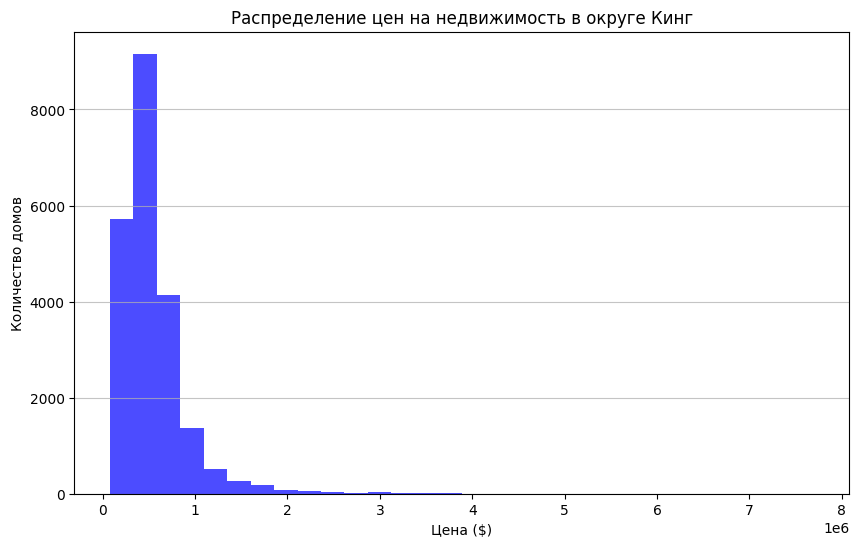

In [ ]:
# импорт модулей
import pandas as pd
import matplotlib.pyplot as plt

# Название файла
data = pd.read_csv('kc_house_data.csv')

plt.figure(figsize=(10, 6))  # Размер фигуры
plt.hist(data['price'], bins=30, color='blue', alpha=0.7)  # Гистограмма
plt.title('Распределение цен на недвижимость в округе Кинг')  # Заголовок
plt.xlabel('Цена ($)')
plt.ylabel('Количество домов')  # Подписи осей
plt.grid(axis='y', alpha=0.75)  # Сетка
plt.show()  # Показываем график

**Вывод:**

1) График имеет явную положительную асимметрию, указывая на то, что большая часть домов стоит недорого, в то время как высокие цены встречаются реже.

2) Основное количество домов сосредоточено в ценовом диапазоне до 500,000 долларов.

3) График показывает, что количество домов с ценами выше 1,000,000 долларов значительно меньше.

### **Общий вывод:**

1) Цены на дома показывают значительную зависимость от площади и количества спален, с общей положительной корреляцией, что свидетельствует о том, что более просторные и многокомнатные дома оцениваются выше.

2) Ярко выраженная сезонная активность в июле и августе указывает на высокую конкурентоспособность в теплые месяцы, в то время как зимние месяцы характеризуются низкими объемами продаж.

3) Хотя возраст дома не оказывает сильного влияния на цену, состояние является критическим фактором. Дома в лучшем состоянии значительно сильно ценятся выше, что подчеркивает важность ухода за недвижимостью.

4) Наблюдается обратная зависимость между ценой и площадью участка на высоких значениях, что может указывать на насыщение рынка. Есть также дорогие дома на малых участках, что говорит о престижности некоторых локаций.

5) Преобладают дома с 2 и 3 ванными комнатами, что указывает на их популярность. Одно- и двухэтажные дома являются наиболее распространенными, в то время как дома с большим количеством этажей менее распространены на рынке.

6) Средние цены на дома устойчиво растут, что может свидетельствовать о стабильных экономических условиях и повышенном интересе к недвижимости в регионе.